<a href="https://colab.research.google.com/github/abdullohumar/healthcare-dataset-stroke-data/blob/main/predictiveanalyticsmahir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data
Kita akan mengambil dataset dari kaggle dengan judul healthcare dataset stroke data

Pertama kita harus mengunggah credential API (file kaggle.json) ke session Colab kita

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"abdullohumar1","key":"8ac0c29786d4758373ac87a8095a3a7c"}'}

Setelah itu kita membuat direktori .kaggle di home directory, lalu kita salin file kaggle.json (berisi API key) ke direktori .kaggle dan kita ubah permission file kaggle.json agar hanya bisa dibaca oleh pemilik

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Setelahnya kita unduh dataset stroke dari Kaggle

In [ ]:
!kaggle datasets download --force -d godfatherfigure/healthcare-dataset-stroke-data

Dataset URL: https://www.kaggle.com/datasets/godfatherfigure/healthcare-dataset-stroke-data
License(s): unknown
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 171MB/s]


Kita ekstrak file zip yang telah diunduh

In [ ]:
import zipfile

with zipfile.ZipFile('/content/healthcare-dataset-stroke-data.zip', 'r') as zip_ref:
    zip_ref.extractall('stroke_dataset')

Kita lihat isi-nya

In [ ]:
import os
os.listdir('stroke_dataset')

['healthcare-dataset-stroke-data.csv']

Kita cek kontennya (5 teratas)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/stroke_dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Kita lihat overview dataset kita

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Understanding


Cek jenis value apa saja yang ada di kolom kategorikal

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Pilih kolom bertipe kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# List untuk hasil
rows = []

for col in categorical_cols:
    unique_vals = df[col].unique()
    rows.append({
        'Kolom': col,
        'Unique Values': list(unique_vals),
        'Jumlah Unique': len(unique_vals)
    })

# Buat DataFrame dari hasil
result = pd.DataFrame(rows)

# Tampilkan tabel langsung
result

,Kolom,Unique Values,Jumlah Unique
0,gender,"[Male, Female, Other]",3
1,ever_married,"[Yes, No]",2
2,work_type,"[Private, Self-employed, Govt_job, children, Never_worked]",5
3,Residence_type,"[Urban, Rural]",2
4,smoking_status,"[formerly smoked, never smoked, smokes, Unknown]",4


Kita coba lihat sebaran datanya menggunakan grafik

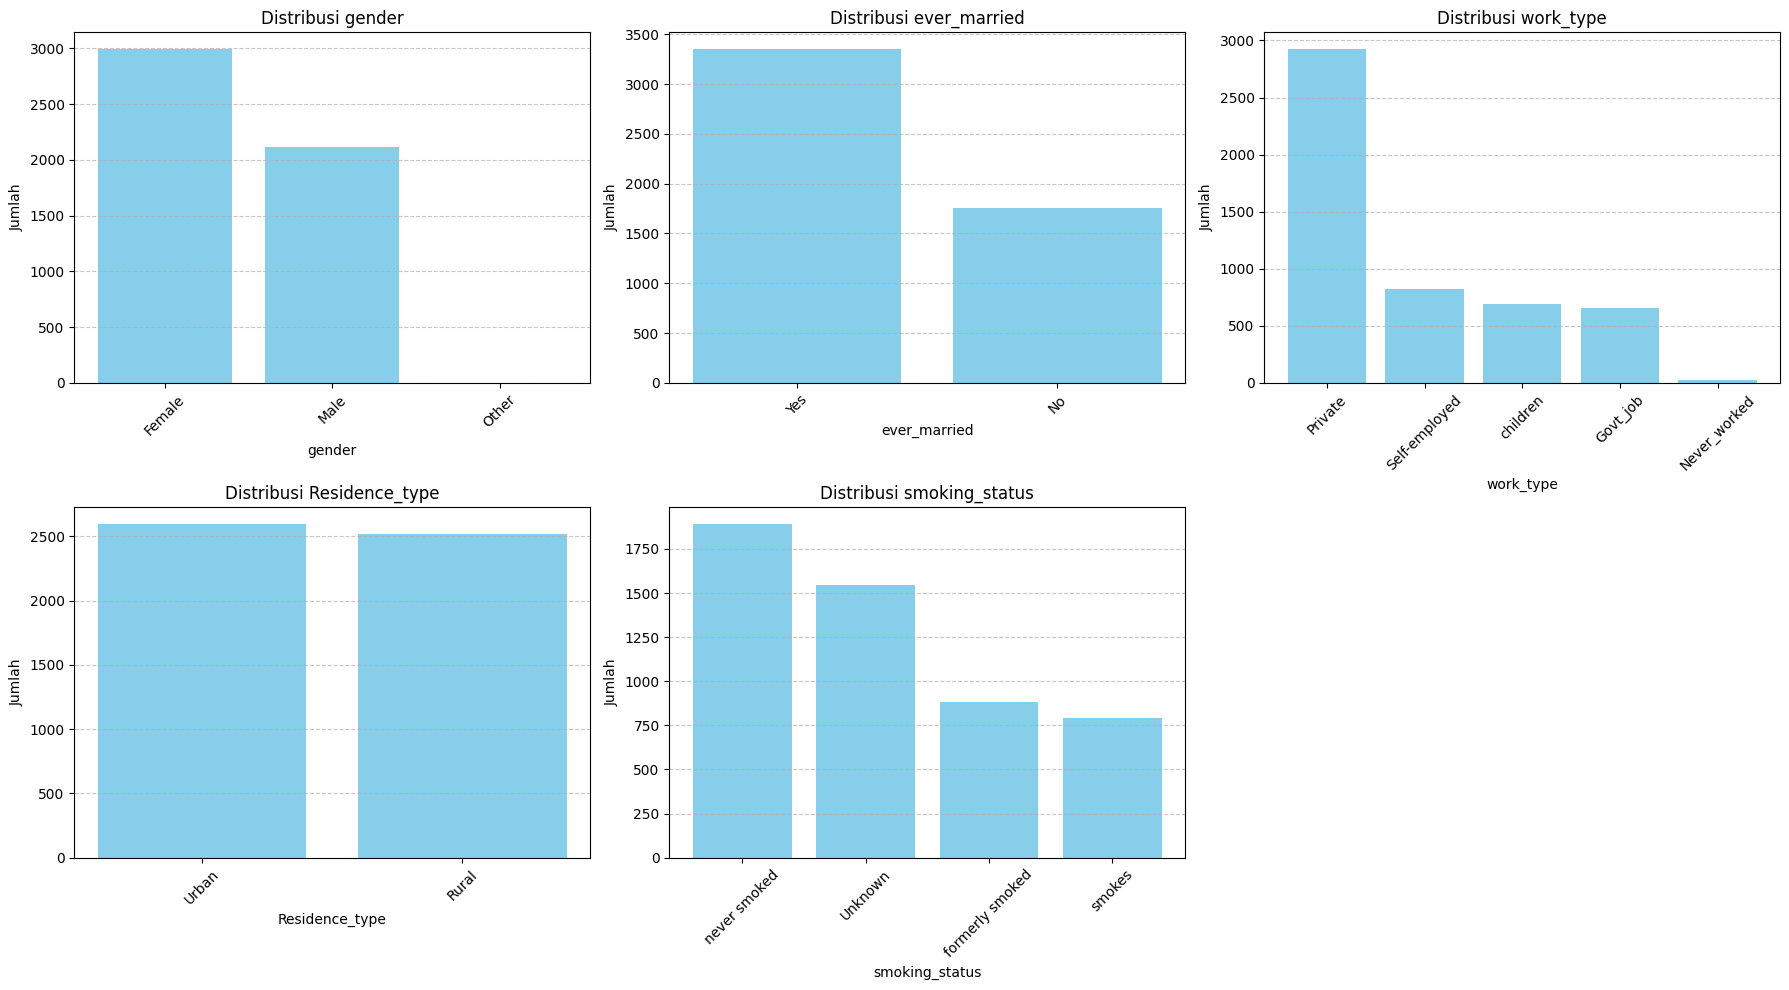

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()

    axes[i].bar(counts.index, counts.values, color='skyblue')
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Kita cek outliersnya

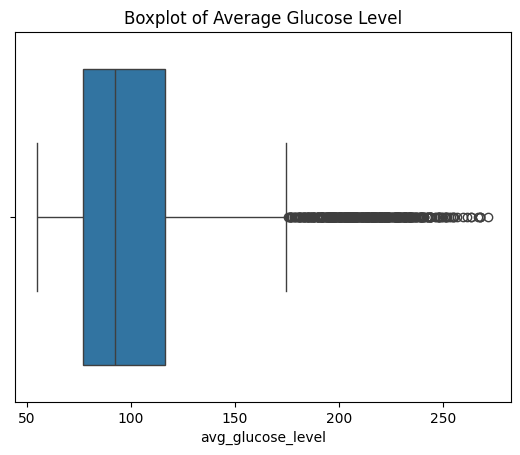

In [104]:
import seaborn as sns
# kita lihat pakai ilustrasi
import matplotlib.pyplot as plt

sns.boxplot(x='avg_glucose_level', data=df)
plt.title('Boxplot of Average Glucose Level')
plt.show()

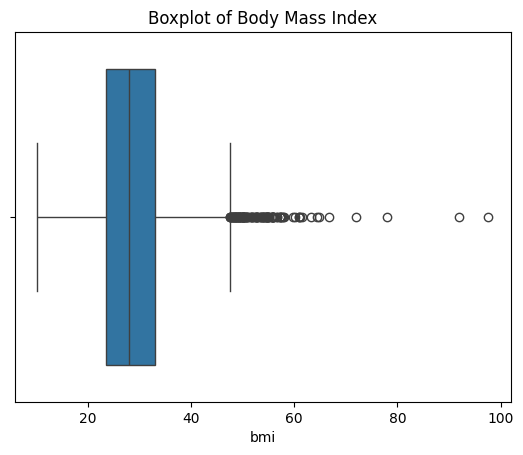

In [ ]:
sns.boxplot(x='bmi', data=df)
plt.title('Boxplot of Body Mass Index')
plt.show()

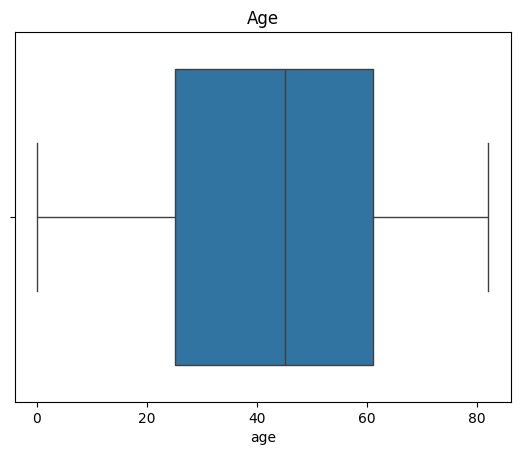

In [ ]:
sns.boxplot(x='age', data=df)
plt.title('Age')
plt.show()

Kita coba visualisasikan menggunakan pie chart untuk melihat perbandingan data di kolom dengan value binary

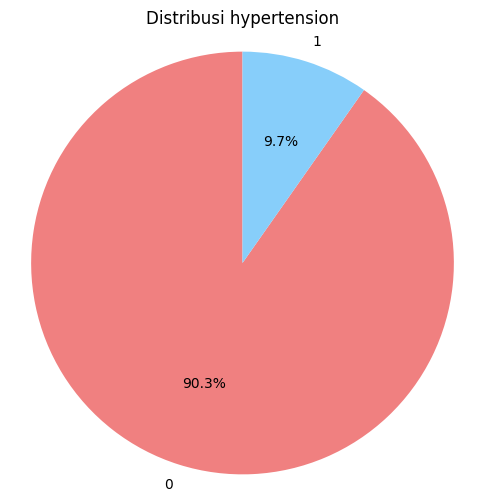

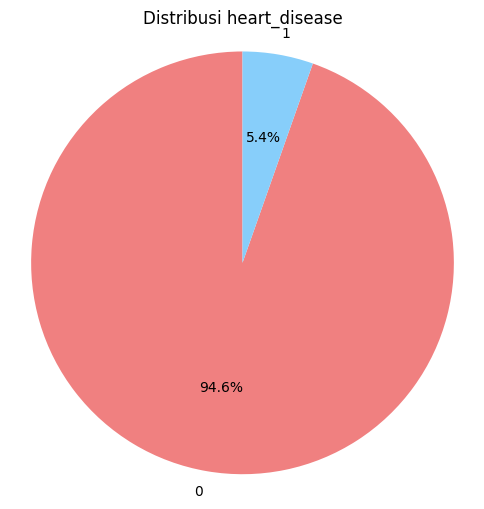

In [ ]:
import matplotlib.pyplot as plt

binary_cols = ['hypertension', 'heart_disease']

for col in binary_cols:
    plt.figure(figsize=(6, 6))
    counts = df[col].value_counts()

    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
    plt.title(f'Distribusi {col}')
    plt.axis('equal')
    plt.show()

Kita lihat sebaran data target

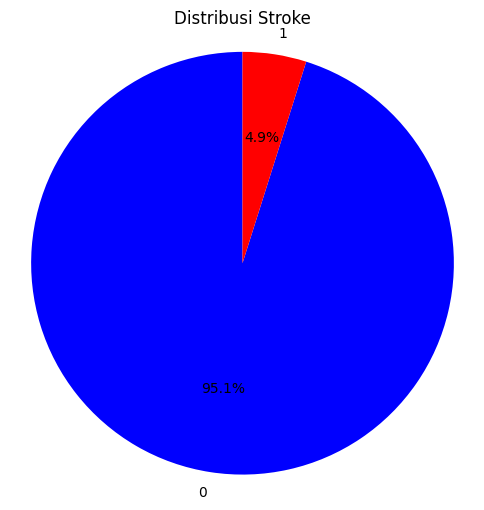

In [ ]:
import matplotlib.pyplot as plt

# Pie chart untuk kolom stroke
plt.figure(figsize=(6, 6))
counts = df['stroke'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Distribusi Stroke')
plt.axis('equal')  # Supaya bentuk pie nya bulat sempurna
plt.show()


kita cek distribusi data numerik (selain biner)

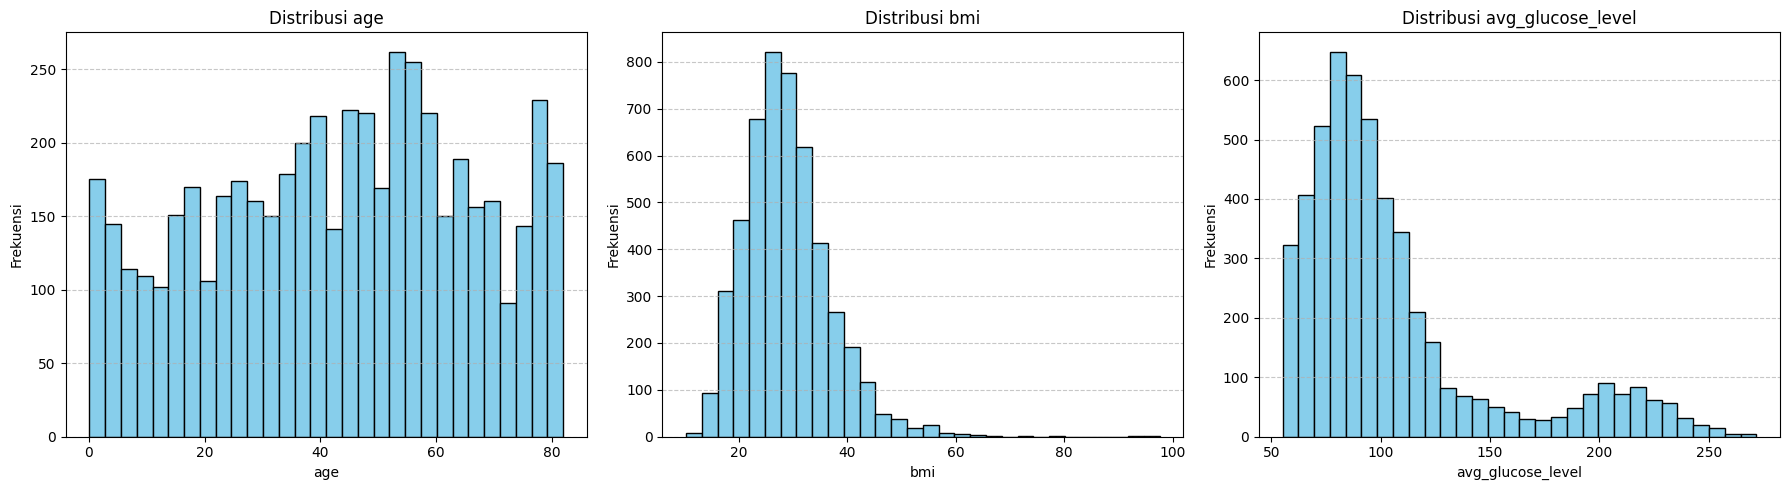

In [ ]:
import matplotlib.pyplot as plt

# List kolom yang mau dibuat histogram
cols = ['age', 'bmi', 'avg_glucose_level']

# Buat figure besar
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Looping buat plot masing-masing kolom
for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Kita lihat kolerasi data dengan heatmap

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

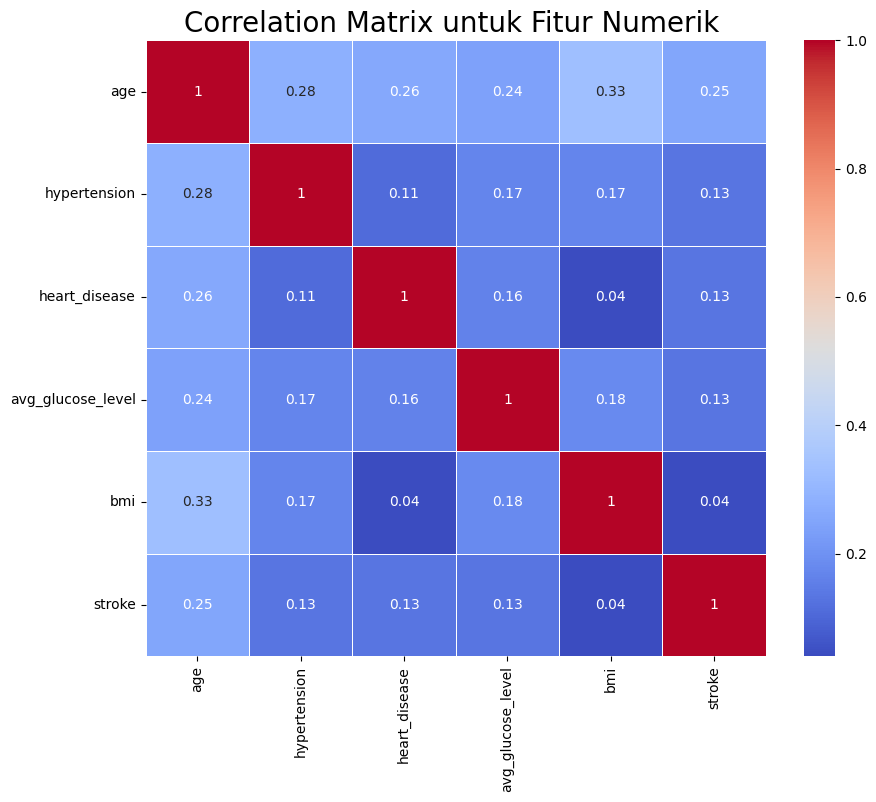

In [ ]:
numerical_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Data Preparation
Pada tahap ini kita akan melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahap persiapan data perlu dilakukan, yaitu:

1. Drop kolom yang tidak digunakan dalam pemrosesan data
2. Membersihkan data
3. Encoding fitur kategori
4. Pembagian dataset antara fitur dan target

### Drop kolom yang tidak digunakan dalam pemrosesan data
Pada tahap ini ada beberapa kolom pada dataset yang tidak perlu digunakan dalam pemrosesan data yakni id dan bmi. Kolom-kolom ini akan dihapus menggunakan fungsi drop().

In [ ]:
df = df.drop(columns=['id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Pembersihan data
Disini kita akan drop data null, data unknown pada kolom `smoking_status`, data other pada `gender` dan pembersihan outliers untuk kolom `bmi` dan `avg_glucose_level`

In [ ]:
# 1. Drop NaN pada smoking_status
df = df.dropna()

# 2. Drop baris 'Unknown' di smoking_status
df = df[df['smoking_status'] != 'Unknown']

# 3. Drop baris 'Other' di gender
df = df[df['gender'] != 'Other']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.1+ KB


In [ ]:
# 4. Penghapusan Outliers pada kolom bmi dan avg_glucose_level
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = df.copy()

df_cleaned = remove_outliers_iqr(df_cleaned, 'bmi')

df_cleaned = remove_outliers_iqr(df_cleaned, 'avg_glucose_level')

print("Jumlah data setelah membersihkan outliers:", df_cleaned.shape[0])

Jumlah data setelah membersihkan outliers: 2890


### Encoding fitur kategori
Disini kita akan ubah fitur kategorikal menjadi numerik agar bisa diproses oleh model. Data yang binary akan kita ubah menggunakan `LabelEncoder` dan data yang multipel akan kita ubah menggunakan `HotEncoder`

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Salin df biar gak ngubah aslinya
df_encoded = df_cleaned.copy()

# 1. Label encoding untuk binary
label_cols = ['gender', 'ever_married', 'Residence_type']
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2. One-hot encoding untuk kolom dengan lebih dari 2 kategori
df_encoded = pd.get_dummies(df_encoded, columns=['work_type', 'smoking_status'], drop_first=True)

# Hasil akhir
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
2,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,True
6,1,74.0,1,1,1,0,70.09,27.4,1,False,True,False,False,True,False
7,0,69.0,0,0,0,1,94.39,22.8,1,False,True,False,False,True,False
10,0,81.0,1,0,1,0,80.43,29.7,1,False,True,False,False,True,False


### Pembagian data antara fitur dan target
Kita jalankan proses ini agar bisa diproses lebih lanjut

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['stroke'])  # Semua kolom kecuali target
y = df_encoded['stroke']                # Target variabel

Kita atur mana seberapa seberapa besar data yang digunakan untuk pelatihan/train dan data untuk pengujian/test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5110
Total # of sample in train dataset: 4088
Total # of sample in test dataset: 1022


In [96]:
# Lakukan SMOTE hanya di X_train dan y_train
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Model Development
Disini kita akan melakukan pemilihan model dengan cara kita latih beberapa model lalu kita pilih yang terbaik menurut saya. Kita akan menggunakan `train_mse` dan `test_mse` untuk mengukur tingkat miss prediksinya

Model yang pertama kita gunakan adalah `KNN` karena ia sederhana dan bisa menjadi baseline yang bagus sebelum mencoba model kompleks.

In [97]:
# Model Development
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['KNN', 'RandomForest', 'Boosting'])
# 1. K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_smote, y_train_smote)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred=knn.predict(X_train_smote), y_true=y_train_smote)
models


,KNN,RandomForest,Boosting
train_mse,0.068863,NaN,NaN
test_mse,NaN,NaN,NaN


Model kedua adalah RandomForest karena ia lebih tahan terhadap outliers, mengingat kita tidak melakukan penanganan apapun terhadap outliers yang ada, mungkin ini akan menjadi yang terbaik

In [99]:
# 2. RandomForest
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=42, n_jobs=-1)
RF.fit(X_train_smote, y_train_smote)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train_smote), y_true=y_train_smote)
models

,KNN,RandomForest,Boosting
train_mse,0.068863,0.005396,NaN
test_mse,NaN,NaN,NaN


Model terakhir yang akan kita gunakan adalah boosting atau lebih tepatnya `AdaBoostRegressor`, karena ia mampu menangkap pola kompleks dengan meningkatkan performa iteratif, ia juga fokus pada error sebelumnya (berat lebih besar diberikan pada prediksi yang salah) dan biasanya hasilkan performa lebih baik dari bagging (seperti RF) jika data cukup bersih dan proporsional. Namun karena kurang tahan terhadap outliers, kita akan menggunakan learning_rate yang rendah agar model belajar lebih perlahan



In [100]:
#  3. Boosting Algorthm
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=42)
boosting.fit(X_train_smote, y_train_smote)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train_smote), y_true=y_train_smote)
models

,KNN,RandomForest,Boosting
train_mse,0.068863,0.005396,0.134345
test_mse,NaN,NaN,NaN


Kita akan merangkum hasil dari model kita terhadap error-nya

In [101]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algorihm
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN':knn, 'RF':RF, 'Boosting':boosting}

# hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train_smote, y_pred=model.predict(X_train_smote))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# panggil mse
mse

,train,test
KNN,0.068863,0.172872
RF,0.005396,0.070968
Boosting,0.134345,0.155669


Agar lebih jelas kita akan menampilkan hasil diatas menggunakan grafik

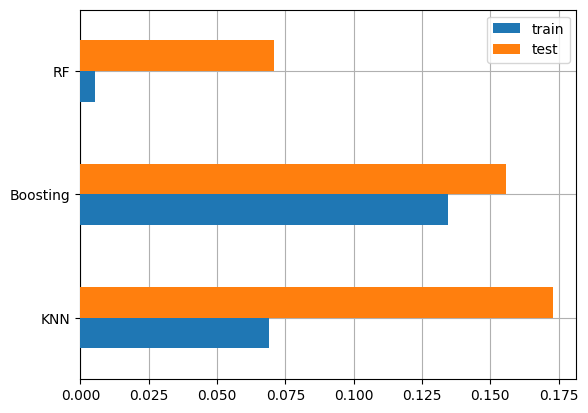

In [102]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Terlihat `RF` dan `KNN` mengalami overfit yang parah, `Boosting` terlihat lebih seimbang antara `train` dan `test`nya. Oleh karena itu, mungkin kita bisa `Boosting` mengingat ia lebih seimbang

Sekarang kita akan coba test masih model-model tersebut menggunakan data

In [103]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2782,0,0.2,0.0,0.0


Ternyata semuanya memprediksi secara benar